# Data Augmentation

El proceso de Data Augmentation consiste en realizar diversas transformaciones sobre los datos de entrada con el objetivo de aportar variabilidad e incrementar el tamaño de mi conjunto de datos, partiendo de los datos ya existentes y etiquetados. Dichas transformaciones puede ser, como vimos en teoria, de distintos tipos, sin embargo, es necesario tener en cuenta solo utilizar las que sean coherentes con el problema puntual sobre el que estamos trabajando.

Para este ejercicio vamos a trabajar con un dataset de imágenes de perros y gatos, el cual contiene 4000 imagenes a color, 2000 de perros y 2000 de gatos. Dichas imágenes ya se encuentran divididas en 3 carpetas correspondientes a entrenamiento, validación y testeo con 2000, 1000 y 1000 imágenes en cada una, respectivamente.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Podemos descargar el dataset al entorno de trabajo, desde una carpea de en Drive a partir de utilizar el ID del archivo dentro de Drive

In [2]:
# https://drive.google.com/file/d/1bx73wWKNgxFZ6sSFSeaKBVcuGtdraKh-/view?usp=sharing
# El ID sera: 1bx73wWKNgxFZ6sSFSeaKBVcuGtdraKh-
!gdown --id 1bx73wWKNgxFZ6sSFSeaKBVcuGtdraKh-

Downloading...
From: https://drive.google.com/uc?id=1bx73wWKNgxFZ6sSFSeaKBVcuGtdraKh-
To: /content/perros_y_gatos.zip
100% 90.8M/90.8M [00:01<00:00, 47.3MB/s]


In [3]:
!unzip /content/perros_y_gatos.zip > /dev/null

## Visualización de los datos

A partir de observar las distintas imágenes, podemos notar que no todas conservan las mismas dimensiones, por lo que será necesario realizar un redimensionamiento do forma que tal que queden uniformes para un posible entrenamiento con capas convolucionales.

In [ ]:
import matplotlib.image as mpimg

image = mpimg.imread("train/cats/cat.106.jpg")

print(image.shape)
plt.imshow(image)

## Utilizar los datos - ImageDataGenerator

Una de las formas de utilizar imágenes en un directorio para nuestro proceso de entrenamiento es mediante el objeto [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?hl=es-419) de Keras. Este objeto, además, nos facilita el proceso de data augmentation sobre los datos junto con el reescalado y normalización de los mismos.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory="train",
                                                    target_size=(150, 150),
                                                    batch_size=32)

valid_generator = valid_datagen.flow_from_directory(directory="validation",
                                                    target_size=(150, 150),
                                                    batch_size=32)

test_generator = test_datagen.flow_from_directory(directory="test",
                                                  target_size=(150, 150),
                                                  batch_size=32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Ahora defino una red neuronal y la entreno, pasandole los datos mediante la instacia del objeto `ImageDataGenerator` creado anteriormente.

In [6]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(150, 150, 3)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=valid_generator)

Epoch 1/20
63/63 [==============================] - 58s 901ms/step - loss: 0.7780 - categorical_accuracy: 0.5300 - val_loss: 0.6855 - val_categorical_accuracy: 0.5540
Epoch 2/20
63/63 [==============================] - 56s 894ms/step - loss: 0.6815 - categorical_accuracy: 0.5695 - val_loss: 0.7145 - val_categorical_accuracy: 0.5670
Epoch 3/20
63/63 [==============================] - 56s 891ms/step - loss: 0.6261 - categorical_accuracy: 0.6505 - val_loss: 0.5776 - val_categorical_accuracy: 0.7060
Epoch 4/20
63/63 [==============================] - 56s 896ms/step - loss: 0.5973 - categorical_accuracy: 0.6985 - val_loss: 0.5725 - val_categorical_accuracy: 0.6860
Epoch 5/20
63/63 [==============================] - 56s 896ms/step - loss: 0.5321 - categorical_accuracy: 0.7340 - val_loss: 0.5628 - val_categorical_accuracy: 0.7000
Epoch 6/20
63/63 [==============================] - 56s 895ms/step - loss: 0.4791 - categorical_accuracy: 0.7655 - val_loss: 0.6080 - val_categorical_accuracy: 0.709

KeyboardInterrupt: ignored

Realizo gráficas del resultado del entrenamiento para visualizar el comportamiento de las métricas a lo largo de las epocas.

NameError: ignored

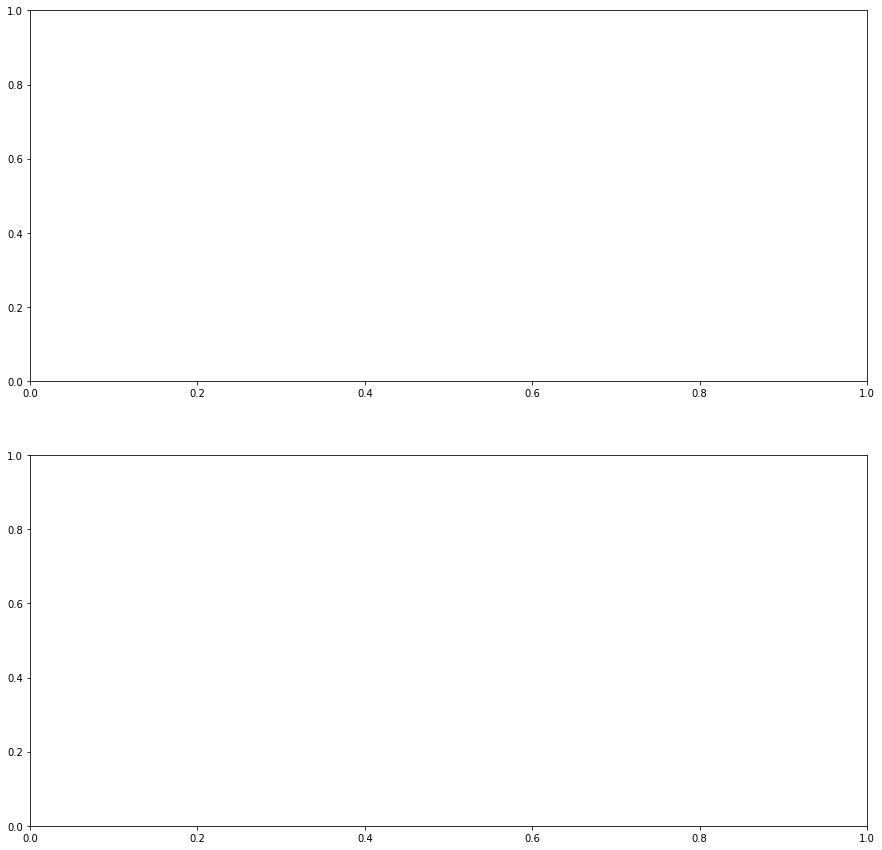

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(history.history['categorical_accuracy']) 
axs[1].plot(history.history['val_categorical_accuracy']) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

Su puede obserar una clara tendencia al sobreentrenamiento del modelo, el cual es debido a, entre otras cosas, la poca cantidad de datos de entrenamiento utilizados.

Si evaluo el modelo con el conjunto de testeo los resultados son:

In [9]:
results = model.evaluate(test_generator)

print("El modelo logro un error de {} y una accuracy de {}".format(results[0], results[1]))

32/32 [==============================] - 8s 254ms/step - loss: 0.8439 - categorical_accuracy: 0.7120
El modelo logro un error de 0.8438674211502075 y una accuracy de 0.7120000123977661


In [10]:
# Limpio la sesion y elimino el objeto de modelo para evitar seguir entrenando sobre el mismo.
from tensorflow.keras import backend as K 
K.clear_session()
del model

---
## Aplicar Data Augmentation

Para aplicar Data Augmentation sobre los datos vamos a utilizar el mismo objeto `ImageDataGenerator` que alimenta nuestra función de entrenamiento. Este objeto puede recibir como parámetros ciertos valores y rangos que definen el comportamiento de un conjunto de técnicas de data augmentation. Además, existe la posibilidad de pasarle una función, mediante el argumento `preprocessing_function`, a través de la cual podríamos definir oras perturbaciones que no esten contempladas por el mismo objeto `ImageDataGenerator`.

---
Una librería que implementa una amplia variedad de algoritmos de data augmentation es [imgaug](https://imgaug.readthedocs.io/en/latest/index.html). A partir del codigo del siguiente bloque, podemos generar una función que aplica de forma aleatoria, los algoritmos que nosotros querramos de dicha librería, y que podemos pasarle al objeto `ImageDataGenerator` como explicamos anteriormente.

In [11]:
from imgaug import augmenters as iaa

aug1 = iaa.GaussianBlur(sigma=(0, 2.0))
aug2 = iaa.AdditiveGaussianNoise(scale=0.02 * 255)

# Defino una función que aplica las transformaciones sobre una imágen
def additional_augmentation(image):
    image = aug1.augment_image(image)
    image = aug2.augment_image(image)
    return image

In [12]:
aug_train_datagen = ImageDataGenerator(width_shift_range=0.3,
                                       height_shift_range=0.3,
                                       brightness_range=[0.6, 1.2],
                                       zoom_range=[0.5, 1.5],
                                       horizontal_flip=True,
                                       rescale=1./255,
                                       preprocessing_function=additional_augmentation)

aug_valid_datagen = ImageDataGenerator(width_shift_range=0.3,
                                       height_shift_range=0.3,
                                       brightness_range=[0.6, 1.2],
                                       zoom_range=[0.5, 1.5],
                                       horizontal_flip=True,
                                       rescale=1./255,
                                       preprocessing_function=additional_augmentation)

aug_train_generator = aug_train_datagen.flow_from_directory(directory="train",
                                                            target_size=(150, 150),
                                                            batch_size=32)

aug_valid_generator = aug_valid_datagen.flow_from_directory(directory="validation",
                                                            target_size=(150, 150),
                                                            batch_size=32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Podemos visualizar el resultado de aplicar dichas transformaciones sobre las imágenes de nuestro dataset. Para ello leemos uno de los archivos imágen y los procesamos con nuestro generador mediante el metodo `flow`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


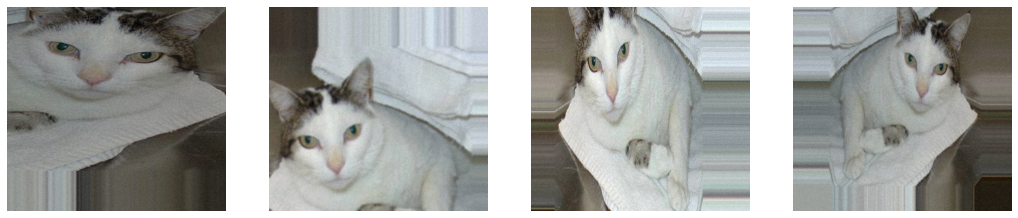

In [14]:
image = plt.imread("train/cats/cat.106.jpg")
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
test_train_generator = aug_train_datagen.flow(image)

fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(test_train_generator.next()[0])
    row.axis('off')
plt.show()

Si ahora, repito el proceso de entrenamiento, utilizando la misma arquitectura de red neuronal del caso anterior, pero pasandole datos sobre los que realizo las perturbaciones antes definidas, mi entrenamiento deberia ser más estable aunque un poco mas lento.

In [ ]:
aug_model = tf.keras.Sequential()

aug_model.add(tf.keras.layers.Input(shape=(150, 150, 3)))
aug_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu"))
aug_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
aug_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
aug_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
aug_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
aug_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
aug_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
aug_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
aug_model.add(tf.keras.layers.Flatten())
aug_model.add(tf.keras.layers.Dense(units=512, activation='relu'))
aug_model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

aug_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

aug_history = aug_model.fit(aug_train_generator,
                            epochs=20,
                            validation_data=aug_valid_generator)

Epoch 1/20
63/63 [==============================] - 86s 1s/step - loss: 0.7457 - categorical_accuracy: 0.5260 - val_loss: 0.6872 - val_categorical_accuracy: 0.5400
Epoch 2/20
63/63 [==============================] - 85s 1s/step - loss: 0.6912 - categorical_accuracy: 0.5435 - val_loss: 0.6701 - val_categorical_accuracy: 0.5750
Epoch 3/20
63/63 [==============================] - 84s 1s/step - loss: 0.6834 - categorical_accuracy: 0.5625 - val_loss: 0.6707 - val_categorical_accuracy: 0.5870
Epoch 4/20
63/63 [==============================] - 84s 1s/step - loss: 0.6656 - categorical_accuracy: 0.5915 - val_loss: 0.6555 - val_categorical_accuracy: 0.6440
Epoch 5/20
63/63 [==============================] - 84s 1s/step - loss: 0.6580 - categorical_accuracy: 0.5990 - val_loss: 0.6511 - val_categorical_accuracy: 0.5880
Epoch 6/20
63/63 [==============================] - 84s 1s/step - loss: 0.6559 - categorical_accuracy: 0.6200 - val_loss: 0.6365 - val_categorical_accuracy: 0.6310
Epoch 7/20
63/63

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(aug_history.history['loss']) 
axs[0].plot(aug_history.history['val_loss']) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(aug_history.history['categorical_accuracy']) 
axs[1].plot(aug_history.history['val_categorical_accuracy']) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

Luego de entrenar, evaluo el modelo con los datos de testeo sin aplicarles data augmentation

In [ ]:
results = aug_model.evaluate(test_generator)

print("El modelo logro un error de {} y una accuracy de {}".format(results[0], results[1]))

In [ ]:
# Limpio la sesion y elimino el objeto de modelo para evitar seguir entrenando sobre el mismo.
from tensorflow.keras import backend as K 
K.clear_session()
del aug_model